In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BatteryProject.ModelThree import trainer
#from BatteryProject.ModelThree.loss import root_mean_squared_error_tf  

import tensorflow as tf
import numpy as np

#from BatteryProject.ModelOne import model_params

2022-06-22 06:00:24.197058: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 06:00:24.197141: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


ModuleNotFoundError: No module named 'xgboost'

In [31]:
feature = {
    'disc_capa' : 'summary_discharge_capacity.csv',
    'dis_ener' : 'summary_discharge_energy.csv',
    'eff_ener' : 'summary_energy_efficiency.csv',
    #'temp_avg' : 'summary_temperature_average.csv',
    'char_capa' : 'summary_charge_capacity.csv',
    'dc_internal_res' : 'summary_dc_internal_resistance.csv'
}

In [32]:
trainer_test = trainer.Trainer(feature)

In [33]:
trainer_test.get_data()

In [34]:
trainer_test.scaling()

In [35]:
print(trainer_test.X_train_scaled.shape)
print(trainer_test.y_train.shape)
print(trainer_test.X_val_scaled.shape)
print(trainer_test.y_val.shape)
print(trainer_test.X_test_scaled.shape)
print(trainer_test.y_test.shape)

(3159, 30, 6)
(3159,)
(1133, 30, 6)
(1133,)
(1156, 30, 6)
(1156,)


In [36]:
trainer_test.get_baseline()
trainer_test.baseline

399.15017607397397

In [53]:
trainer_test.set_pipeline()
trainer_test.run(epochs = 500)

Epoch 1/500
94/99 [===========================>..] - ETA: 0s - loss: 412712.8438 - root_mean_squared_error: 633.5084

KeyboardInterrupt: 

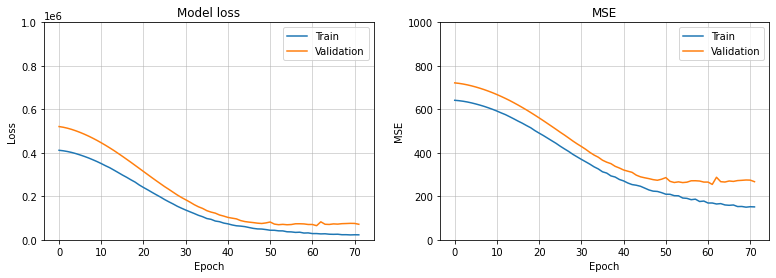

In [45]:
trainer_test.plot_mse()

In [46]:
trainer_test.eval()

37/37 [==============================] - 0s 7ms/step - loss: 24997.8594 - root_mean_squared_error: 158.1071


{'res_train': 137.99795532226562,
 'res_val': 254.724609375,
 'res_test': 158.10711669921875}

In [47]:
y_pred = trainer_test.model.predict(trainer_test.X_train_scaled)
y_true =trainer_test.y_train.reshape(len(trainer_test.y_train), 1)
print(np.sqrt(np.mean(np.square((y_pred - y_true)))))
print(y_pred.max())
print(y_true.max())

137.99794
1290.8525
2209.0


In [48]:
y_pred = trainer_test.model.predict(trainer_test.X_val_scaled)
y_true =trainer_test.y_val.reshape(len(trainer_test.y_val), 1)
print(np.sqrt(np.mean(np.square((y_pred - y_true)))))
print(y_pred.max())
print(y_true.max())

254.72461
1290.535
2160.0


In [49]:
y_pred = trainer_test.model.predict(trainer_test.X_test_scaled)
y_true =trainer_test.y_test.reshape(len(trainer_test.y_test), 1)
print(np.sqrt(np.mean(np.square((y_pred - y_true)))))
print(y_pred.max())
print(y_true.max())

158.1071
1290.8542
1824.0


In [62]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

In [71]:
layer = LSTM(units = 4)

In [78]:
layer.name

'lstm_13'